<a href="https://colab.research.google.com/github/mohith789p/Machine-Learning/blob/main/blog_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

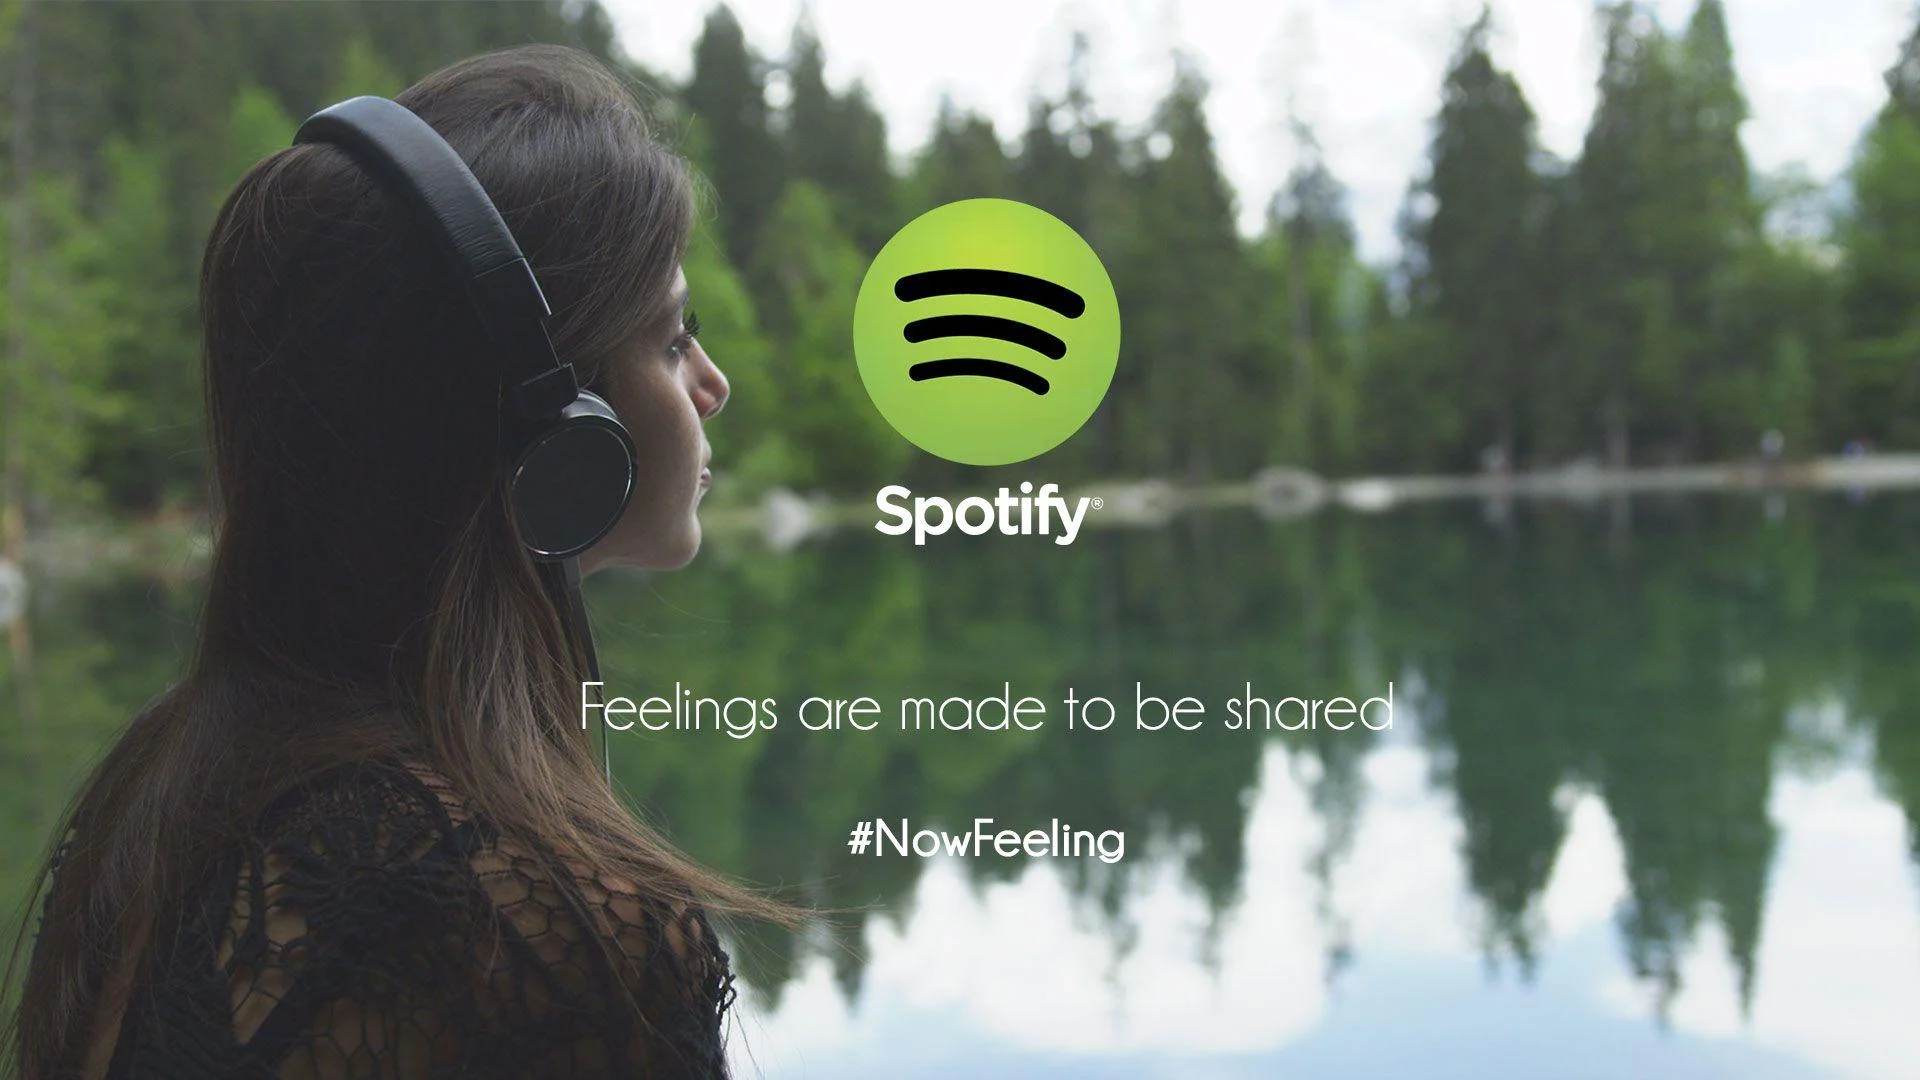

# Introduction

**Music** is more than sound; it's an emotion, a connection, and sometimes even a movement. And with the likes of **Spotify**, music has become that much more accessible, allowing listeners to tap into an enormous universe of tracks ranging from countless genres, moods, and rhythms. But have you ever asked yourself what makes certain songs popular or which genres dominate the playlists?

We go deep into a data set of Spotify tracks that contain trends, correlations, and insights defining the music on the platform. Genre domination, factors that make pop tracks popular, and such aspects are covered in detail as we take you along on this data-driven musical journey through Spotify.

## What is EDA?

**Exploratory Data Analysis (EDA)** is an important part of any data-driven project. It involves the exploration and summarization of datasets to identify patterns, relationships, and trends. In making sense of raw data, EDA helps to identify anomalies, highlight key insights, and lay a foundation for deeper analysis.

We shall perform the EDA of a [Kaggle dataset](https://www.kaggle.com/datasets/michaellanurias/spotify-playlist-origins); this blog is very widely used and referred to by data enthusiasts. This dataset contains more information about `265 different tracks` from Spotify, thus covering technical aspects, such as tempo and danceability, as well as creative factors, such as genres and artist names.
Let us start with exploring the characteristics of the dataset.

## Step 1: **Loading the Dataset**

The first step in any data analysis journey is to load the dataset and take a closer look at its structure. For this data, we’ll use the Pandas library in Python to import the Spotify dataset. This allows us to examine the dataset's size, column names, and the type of data it contains.


In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from the CSV file
spotify_data = pd.read_csv('origins.csv')
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          265 non-null    object 
 1   Track Name        265 non-null    object 
 2   Album Name        265 non-null    object 
 3   Artist Name(s)    265 non-null    object 
 4   Release Date      265 non-null    object 
 5   Duration (ms)     265 non-null    int64  
 6   Popularity        265 non-null    int64  
 7   Added By          265 non-null    object 
 8   Added At          265 non-null    object 
 9   Genres            241 non-null    object 
 10  Record Label      265 non-null    object 
 11  				Danceability  265 non-null    float64
 12  Energy            265 non-null    float64
 13  Key               265 non-null    int64  
 14  Loudness          265 non-null    float64
 15  Mode              265 non-null    int64  
 16  Speechiness       265 non-null    float64
 1

## Step 2: **Data Cleaning**

Raw data seldom comes perfect. Our dataset is not an exception, either. For accurate analysis, we must find and treat missing values, duplicate records, and inconsistent formatting. Missing values may skew our results; hence, either we'll fill them appropriately or eliminate them altogether, based on the context.

We'll also normalize column names to facilitate handling and eliminate extraneous characters or spaces from them.


In [3]:
# Checking for duplicate rows in the dataset
spotify_data.duplicated().sum()

# Checking for missing values in each column
spotify_data.isnull().sum()

,0
Track ID,0
Track Name,0
Album Name,0
Artist Name(s),0
Release Date,0
Duration (ms),0
Popularity,0
Added By,0
Added At,0
Genres,24


The dataset is mostly complete except for missing values in the `Genres` column, which seems to indicate that data imputation or cleaning is needed. To rectify this issue, we're going to replace the missing values with `"Unknown"` This will ensure the dataset is ready for more accurate analysis and model building.

```python
# Replacing missing values in the 'Genres' column with 'Unknown'
spotify_data['Genres'] = spotify_data['Genres'].fillna('Unknown')
```

## Step 3: **Exploring the Features**

Here we start to uncover the story hidden in our data. Using visualizations and descriptive statistics, we will explore individual features like tempo, danceability, and popularity.

### **Numerical Features:**

Histograms and boxplots are essential tools for analyzing the distribution and identifying potential outliers in numerical features like 'Tempo' and 'Loudness'. Here's a breakdown of how they help in understanding the data:

1. **Histogram with KDE (Kernel Density Estimation) Curve:**
   - A histogram provides a visual representation of the distribution of a numerical feature, such as 'Tempo'. It divides the data into bins and shows the frequency of data points in each bin.
   - Adding a KDE curve helps smooth the histogram and provides a clearer understanding of the underlying distribution. It shows the probability density function of the data, highlighting the shape of the distribution (whether it’s normal, skewed, etc.).
   
   **Code Example:**
   ```python
   # Plotting the 'Tempo' distribution with a histogram and KDE curve
   plt.figure(figsize=(8, 4))
   sns.histplot(x='Tempo', data=spotify_data, kde=True, bins=30, color='teal', alpha=0.7)

   # Customizing plot appearance
   plt.title('Tempo Distribution', fontsize=18, fontweight='bold', color='darkblue')
   plt.xlabel('Tempo', fontsize=14, labelpad=10, fontweight='bold', color='darkgreen')
   plt.ylabel('Frequency', fontsize=14, labelpad=10, fontweight='bold', color='darkgreen')
   plt.grid(axis='y', linestyle='--', alpha=0.7)
   plt.xticks(fontsize=12, color='darkred')
   plt.yticks(fontsize=12, color='darkred')
   plt.tight_layout()
   plt.show()
   ```

   **What the Code Does:**
   - **`sns.histplot()`**: Creates the histogram with a KDE curve, where the 'Tempo' feature is plotted on the x-axis. The bins parameter defines the number of intervals in the histogram.
   - **Customization**: The title, x and y labels, and grid lines are customized to make the plot more readable and visually appealing.

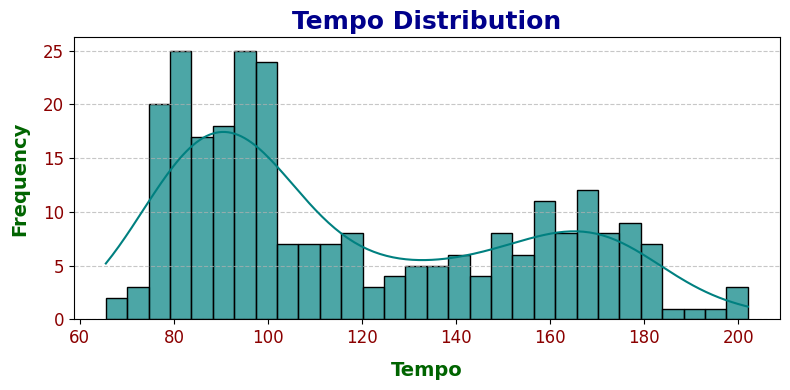

2. **Boxplot for Outlier Detection:**
   - A boxplot is another useful visualization that helps in identifying outliers and understanding the spread of the data. It shows the median, quartiles, and potential outliers in the dataset. This is particularly useful when analyzing features like 'Loudness', as extreme values may significantly impact the overall analysis.
   - The boxplot can reveal skewness and help identify if the data needs transformation or normalization.

   **Code Example for Boxplot:**
   ```python
   # Creating a boxplot for 'Loudness' distribution
   plt.figure(figsize=(8, 4))
   sns.boxplot(x='Loudness', data=spotify_data, color='mediumorchid', width=0.5, linewidth=2.,flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})

   # Customizing plot appearance
   plt.title('Loudness Distribution', fontsize=18, fontweight='bold', color='darkviolet')
   plt.xlabel('Loudness (dB)', fontsize=14, labelpad=10, fontweight='bold', color='darkgreen')
   plt.ylabel('Density', fontsize=14, labelpad=10, fontweight='bold', color='darkgreen')
   plt.grid(axis='y', linestyle='--', alpha=0.7)
   plt.xticks(fontsize=12, color='darkblue')
   plt.yticks(fontsize=12, color='darkblue')
   plt.tight_layout()
   plt.show()
   ```

   **What the Code Does:**
   - **`sns.boxplot()`**: Creates the boxplot for the 'Loudness' feature. The boxplot shows the median, the interquartile range (IQR), and potential outliers represented as individual points outside the whiskers.
   - **Customization**: The title, labels, and tick labels are styled for better clarity.

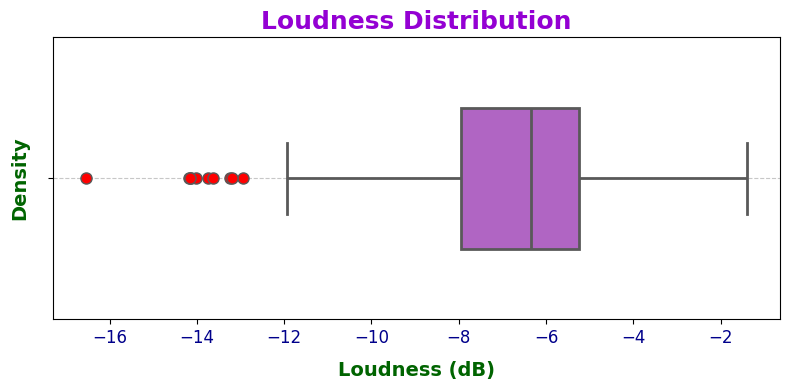


By using these visualizations, you can easily identify patterns, trends, and potential issues in the numerical data.



### **Categorical Features:**

For categorical features like 'Genres' and 'Artists', **count plots** and **bar charts** are effective in showing the frequency distribution of each category. These visualizations help identify the most popular or dominant categories within the dataset.

1. **Count Plot for Top 20 Genres:**
   - A **count plot** visualizes the frequency of each genre within the top 20 genres. It helps in identifying which genres are most prevalent in the dataset.
   - **`sns.countplot()`** is used to create a bar plot where the x-axis represents the genre categories and the y-axis represents the count or frequency of each genre.

   **Code Example:**
   ```python
   # Limit to top 20 genres and filter the data
   top_genres = genre_counts.head(20)
   top_genres_list = top_genres.index
   filtered_genres = all_genres[all_genres.isin(top_genres_list)]

   # Create the count plot for the top 20 genres
   plt.figure(figsize=(9, 7))
   sns.countplot(x=filtered_genres, palette='coolwarm')

   # Customize plot appearance
   plt.title('Top 20 Genres Distribution', fontsize=20, fontweight='bold', color='darkblue')
   plt.xlabel('Genres', fontsize=16, fontweight='bold', color='darkblue', labelpad=15)
   plt.ylabel('Count', fontsize=16, fontweight='bold', color='darkblue', labelpad=15)
   plt.xticks(rotation=90, fontsize=14, color='darkgreen')
   plt.yticks(fontsize=14, color='darkgreen')
   plt.grid(axis='y', linestyle='--', alpha=0.7)
   plt.tight_layout()
   plt.show()
   ```

   **What the Code Does:**
   - **`genre_counts.head(20)`**: Extracts the top 20 genres based on frequency.
   - **`sns.countplot()`**: Plots the count of each genre, where the `filtered_genres` variable contains the top 20 genres.
   - **Customization**: The plot's appearance, including title, axis labels, tick labels, and gridlines, is customized for better clarity and presentation.

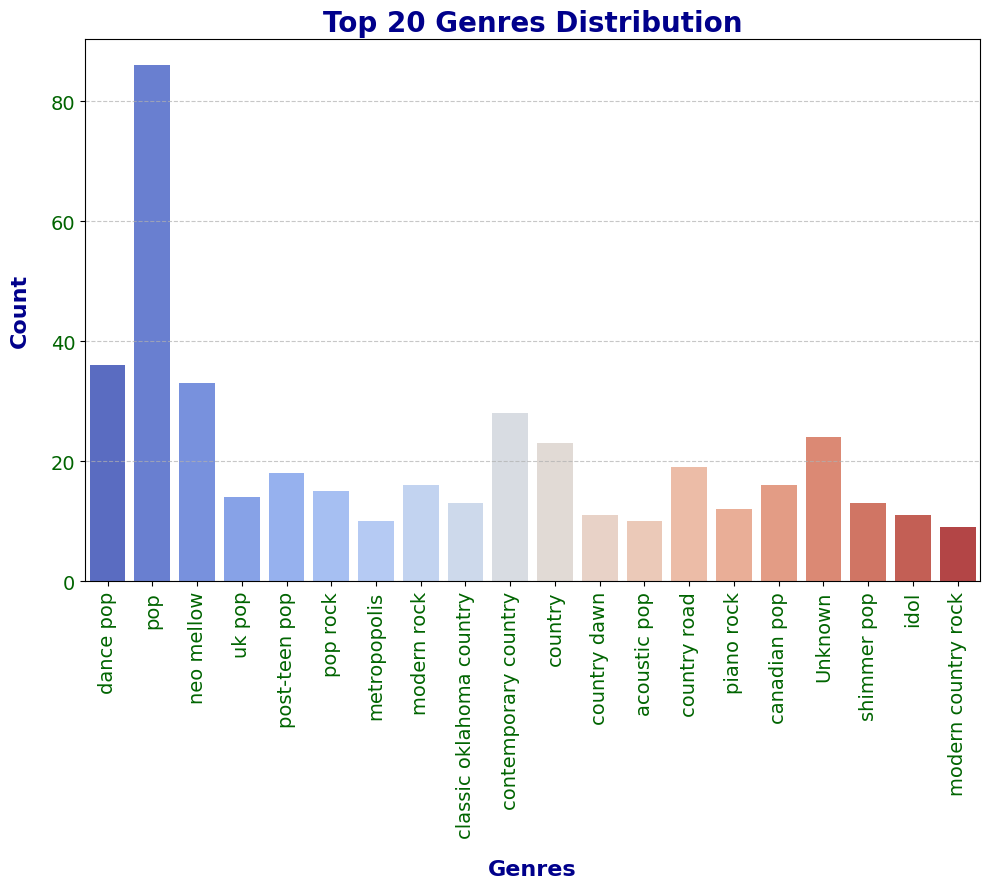

2. **Bar Plot for Top 20 Artists:**
   - A **bar plot** is used to show the frequency of the top 20 artists. It helps in understanding which artists appear most frequently in the dataset.
   - **`sns.barplot()`** is used for this, where the x-axis represents the artist names and the y-axis represents the frequency count.

   **Code Example:**
   ```python
   # Extract and count the top 20 artists
   all_artists = spotify_data['Artist Name(s)'].str.split(',').explode()
   artist_counts = all_artists.value_counts()
   top_artists = artist_counts.head(20)

   # Create the bar plot with a new color palette
   plt.figure(figsize=(10, 9))
   sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

   # Customize plot appearance
   plt.title('Top 20 Artists Distribution', fontsize=20, fontweight='bold', color='darkviolet')
   plt.xlabel('Artists', fontsize=16, fontweight='bold', color='darkviolet', labelpad=15)
   plt.ylabel('Count', fontsize=16, fontweight='bold', color='darkviolet', labelpad=15)
   plt.xticks(rotation=90, fontsize=14, color='darkblue')
   plt.yticks(fontsize=14, color='darkblue')
   plt.grid(axis='y', linestyle='--', alpha=0.7)
   plt.tight_layout()
   plt.show()
   ```

   **What the Code Does:**
   - **`all_artists.str.split(',').explode()`**: Splits the 'Artist Name(s)' column into individual artist names and flattens the list.
   - **`sns.barplot()`**: Creates a bar plot with the top 20 artists, using the 'viridis' color palette.
   - **Customization**: Similar to the genre plot, the title, axis labels, tick labels, and gridlines are adjusted for clarity.

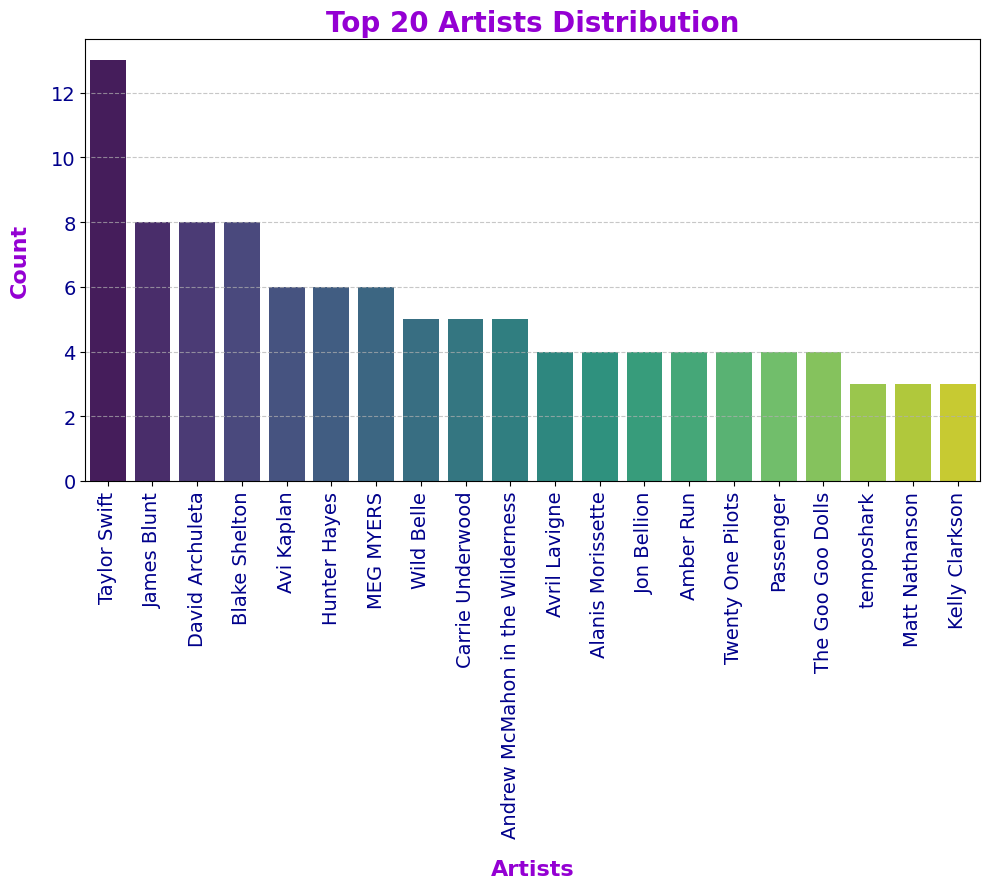

These visualizations help to identify the dominant genres and artists, allowing for a deeper understanding of the distribution of categorical data within the dataset.


### **Correlation Analysis:**

To explore the relationships between numerical features in the dataset, a **correlation matrix** can be calculated. This matrix reveals how different numerical variables are related to one another, and a **heatmap** is an effective way to visualize these relationships.

1. **Correlation Matrix:**
   - The **correlation matrix** calculates pairwise correlation coefficients between numerical features. These coefficients range from -1 to 1, where:
     - **1** indicates a perfect positive correlation (both variables increase together).
     - **-1** indicates a perfect negative correlation (one variable increases as the other decreases).
     - **0** indicates no linear correlation.
   - The **`select_dtypes()`** method is used to filter out only the numerical columns in the dataset, and the **`corr()`** method computes the correlation matrix for those selected columns.

   **Code Example:**
   ```python
   # Select only numerical columns and calculate the correlation matrix
   numerical_columns = spotify_data.select_dtypes(include=['number'])
   correlation_matrix = numerical_columns.corr()
   ```

2. **Heatmap Visualization:**
   - The **`sns.heatmap()`** function is used to create a heatmap to visualize the correlation matrix. This allows for easy identification of both strong and weak correlations through varying color intensities.
   - The **`magma`** color palette is chosen for clarity, providing a clear contrast for correlation values.
   - **Annotations** in the heatmap display the exact correlation coefficients in each cell, allowing for precise interpretation of the relationships between features.

   **Code Example:**
   ```python
   # Create a heatmap to visualize the correlations
   plt.figure(figsize=(12, 8))
   sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.8, vmin=-1, vmax=1,
               cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'})
   ```

3. **Customization:**
   - The **title**, **x and y labels**, and **tick labels** are customized to enhance readability. The title is set in bold, dark red color to make it stand out.
   - **x and y ticks** are set in navy blue for better contrast, and the **color bar** is labeled with 'Correlation Coefficient' to provide clarity.

   **Code Example:**
   ```python
   # Customize title, labels, and tick labels
   plt.title('Correlation Matrix', fontsize=20, fontweight='bold', color='darkred')
   plt.xlabel('Features', fontsize=14, fontweight='bold', color='darkgreen')
   plt.ylabel('Features', fontsize=14, fontweight='bold', color='darkgreen')
   plt.xticks(fontsize=12, color='navy')
   plt.yticks(fontsize=12, color='navy')

   # Adjust layout and display the plot
   plt.tight_layout()
   plt.show()
   ```

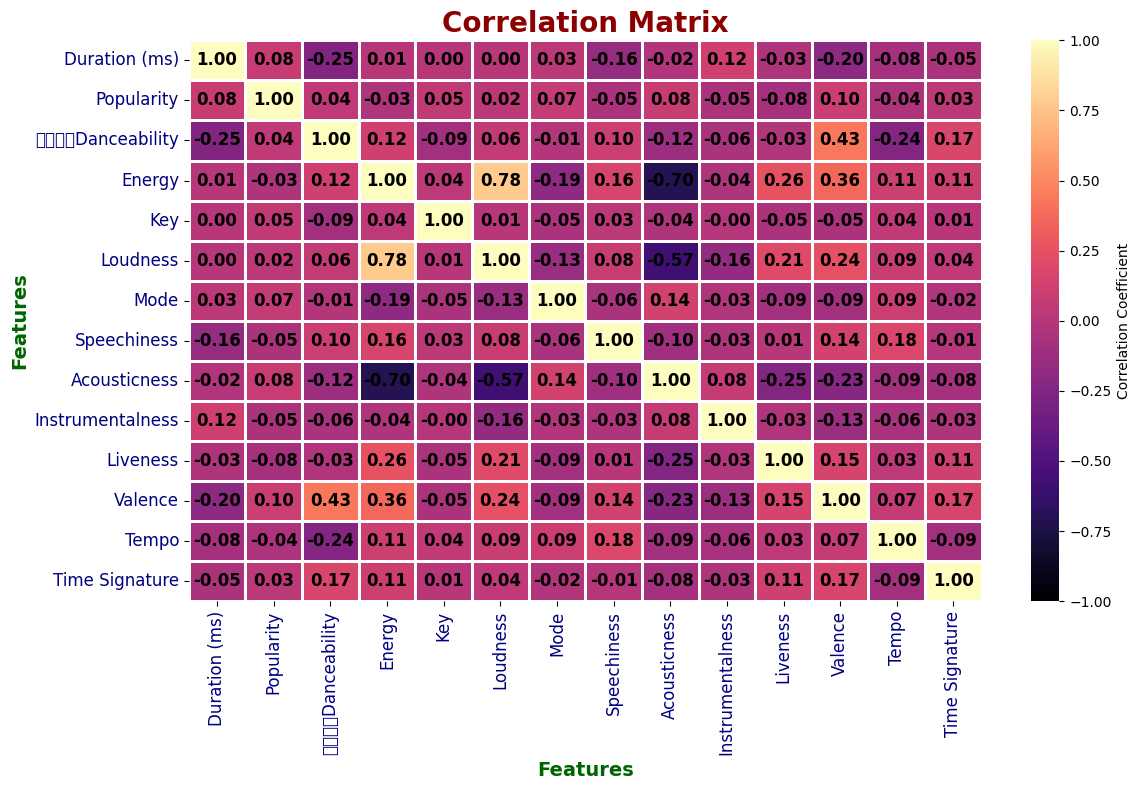



4. **Interpretation:**
   - The **correlation matrix** provides insights into which features are closely related. Strong correlations (either positive or negative) suggest that the variables may influence each other. For instance, if **`Tempo`** and **`Energy`** have a high positive correlation, it suggests that faster tempos tend to correspond with higher energy levels in songs.
   - Weak or no correlations indicate that those features are independent of each other. For example, if **`Loudness`** and **`Acousticness`** have a low or near-zero correlation, it means that the loudness of a track doesn't necessarily relate to its acoustic properties.

By utilizing the **correlation matrix** and **heatmap**, you can easily identify which numerical features are strongly correlated and which are independent, providing valuable insights into the relationships between variables in your dataset.

## Step 4: **Relationship Analysis**
EDA is not just about learning the individual attributes but also about revealing relationship between them. Relationship of variables will help discover really useful trends and dependencies in data. Some inferences based on the relationship observed are follows:

**Danceability and Tempo:** There is a weak negative correlation between Danceability and Tempo (-0.24). This could be interpreted to mean that the faster the track, the less danceable it is. Therefore, it might imply that what is typically "danceable" does not always reflect an energetic, fast-rhythm track.

**Popularity and Loudness:** While the correlation between Popularity and Loudness is very low at 0.08, there does appear to be a tendency for the more popular tracks to have louder volumes, though the relationship is quite weak. This means that while popularity might be determined by many factors other than just the loudness of the track.

**Energy and Loudness:** The positive correlation is very strong at 0.78 between Energy and Loudness, which shows that those tracks with high energy tend to be also louder. This may have to do with the reason that the energetic music such as the upbeat or the high-tempos tends to use the higher volume levels.

**Danceability and Valence:** A moderate positive correlation of 0.43 between Danceability and Valence indicates that tracks that are more danceable seem to be more positively mired in mood or emotional tone. That is congruent with a prediction that one expects music that is upbeat, likely very danceable, as happy, positive, and so forth.

**Speechiness and Energy:** Speechiness and Energy are not highly correlated, but positive, at 0.16, which suggests that tracks with more spoken words, such as rap or podcasts, have a little higher energy level.

We can determine trends and dependency that show deeper interaction behavior of features in the data set, which forms the basis for more complex analyses, like clustering or predictive modeling, where these dependencies will be exploited for better data comprehension or to predict outcome possibilities.

# **Conclusion**:

In this EDA on the Spotify data, various aspects like danceability, energy, loudness, and popularity were found to exhibit meaningful relationships with each other. We found that the loudness has a robust positive correlation with energy; moreover, there is an intermediate correlation of danceability and valence, inferring that the rhythm a track has is associated with its emotional tone. The tempo was only weakly correlated with the other features but showed interesting patterns when compared to the danceability.

Furthermore, we looked at genre distributions and the most prolific artists in the collection, hence getting an overview of very diverse music landscapes on Spotify. The correlation heatmap along with the scatter plots on key dependencies further point these directions for future analysis or machine learning models, including a prediction of a track's popularity based on the features of that track.

This EDA forms the basis for deeper insights of how music characteristics influence preferences of listeners, and, more importantly, it's a starting point for far more advanced analyses, for example, clustering similar tracks or building recommendation systems.

# Future Work

Although the present EDA provides insight into a rich interplay of multiple features of tracks in Spotify, a considerable amount of future work for a proper and detailed analysis lies in the following directions:

**Feature Engineering**:
We can generate new features from the ones already existing either by combination or transformation. For instance, getting danceability and energy together with tempo can result in a grooviness score that may provide an even better score for estimating user engagement or track popularity.

**Prediction Models**:
Building predictive models may further advance this analysis. Exploiting the relationships identified between features, regression or classification can be applied by machine learning techniques to predict outcomes such as track popularity, user ratings, or chart performance.

**Genre-Specific Analysis**:
Further segmented by genre, this would unveil genre-specific trends and patterns. This would allow more tailored insights in helping the creation of playlists or understand which features influence popularity in different genres.

Further investigation into these areas will further improve our understanding of music dynamics and user behavior on the platform, leading to improvements in music discovery and in the design of recommendation algorithms.

